In [1]:
import torch
import torchvision
from PIL import ImageDraw

In [2]:
from detrac import Detrac
import dataset.transforms as T

In [3]:
root = r"D:\dataset\UA-DETRAC\Detrac_dataset"

In [4]:
transforms = []
transforms.append(T.ToTensor())
transformscompose = T.Compose(transforms)

In [5]:
detrac = Detrac(root,imgformat='jpg',transforms=transformscompose)

In [6]:
detrac[0]

(tensor([[[0.2941, 0.3255, 0.3216,  ..., 0.5216, 0.5176, 0.5176],
          [0.3020, 0.3216, 0.3098,  ..., 0.5216, 0.5176, 0.5176],
          [0.2980, 0.3020, 0.2863,  ..., 0.5255, 0.5216, 0.5216],
          ...,
          [0.2235, 0.2235, 0.3686,  ..., 0.4549, 0.4667, 0.5490],
          [0.2392, 0.2196, 0.3490,  ..., 0.4863, 0.5176, 0.5804],
          [0.2353, 0.2078, 0.3333,  ..., 0.5725, 0.5765, 0.5608]],
 
         [[0.2510, 0.2824, 0.2784,  ..., 0.4510, 0.4471, 0.4471],
          [0.2588, 0.2784, 0.2667,  ..., 0.4510, 0.4471, 0.4471],
          [0.2549, 0.2588, 0.2431,  ..., 0.4549, 0.4510, 0.4510],
          ...,
          [0.1882, 0.1882, 0.3333,  ..., 0.4431, 0.4549, 0.5373],
          [0.2118, 0.1922, 0.3216,  ..., 0.4706, 0.5020, 0.5647],
          [0.2078, 0.1804, 0.3059,  ..., 0.5569, 0.5608, 0.5451]],
 
         [[0.2431, 0.2745, 0.2706,  ..., 0.4353, 0.4314, 0.4314],
          [0.2510, 0.2706, 0.2588,  ..., 0.4353, 0.4314, 0.4314],
          [0.2471, 0.2510, 0.2353,  ...,

In [23]:
totensor = torchvision.transforms.ToTensor()

In [29]:
totensor(detrac[0][0]).dim()

3

In [7]:
checkpoint = torch.load(r"D:\dataset\UA-DETRAC\model_9.pth",map_location='cpu')

In [8]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
        num_classes=5, pretrained=False)

In [9]:
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [10]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [30]:
model([totensor(detrac[0][0])])

[{'boxes': tensor([[545.0101,  87.7742, 579.0245, 118.2139],
          [733.2170, 115.0246, 781.6520, 153.1251],
          [558.7780, 120.1266, 602.2603, 161.2027],
          [507.8329,  66.7879, 533.4876,  92.2747],
          [589.8132, 375.5112, 746.0576, 535.6386],
          [553.1576,  70.0102, 581.5256,  91.4271],
          [898.4355, 253.2777, 959.8397, 338.6837],
          [553.5417,  66.2503, 580.1727,  81.8915]], grad_fn=<StackBackward>),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1]),
  'scores': tensor([1.0000, 1.0000, 0.9999, 0.9999, 0.9995, 0.9992, 0.8904, 0.1124],
         grad_fn=<IndexBackward>)}]

In [11]:
def drawbbox(img, bboxes):
    if not img or len(bboxes) == 0:
        return
    draw = ImageDraw.Draw(img)
    for item in bboxes:
        draw.rectangle(item.tolist(), outline='red', width=3)
    display(img)

tran = torchvision.transforms.ToPILImage(mode='RGB')
def showgt(imgtensor,bboxes):
    img = tran(imgtensor)
    drawbbox(img,bboxes)
    
def evaulate(img):
    model.eval()
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    #img = totensor(img)
    with torch.no_grad():
        prediction = model([img.to(device)])
    return prediction

def modelpredict(testdataset,index):
    predict = evaulate(testdataset[index][0])
    showgt(testdataset[index][0],predict[0]['boxes'])

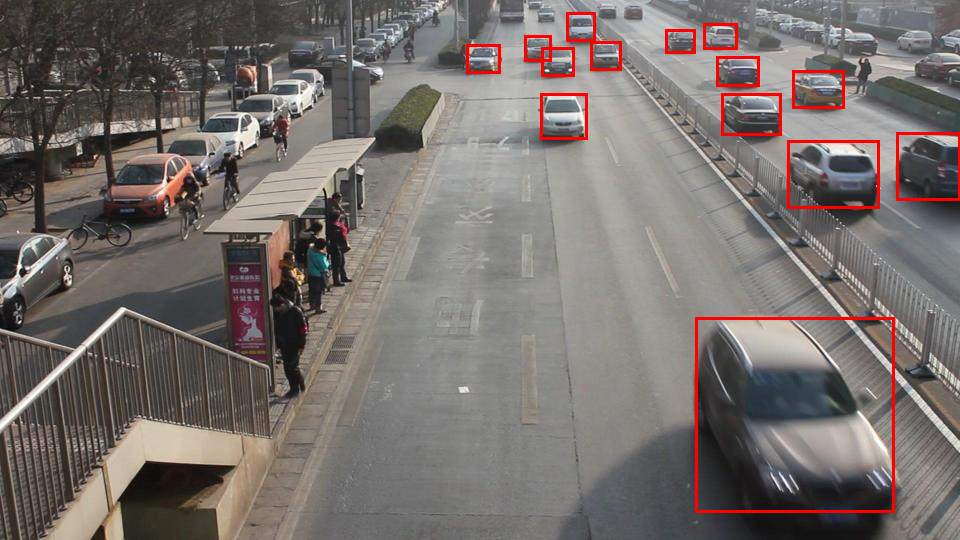

In [12]:
modelpredict(detrac,313)

In [13]:
from carpk import Carpk
from torchvision import transforms
carpklotdataset = Carpk('D:\ISO\datasets\CARPK_devkit', 'test', transforms=transformscompose,imgformat='png')
pucprdataset = Carpk('D:\ISO\datasets\PUCPR+_devkit', 'test', transforms=transformscompose,imgformat='jpg')

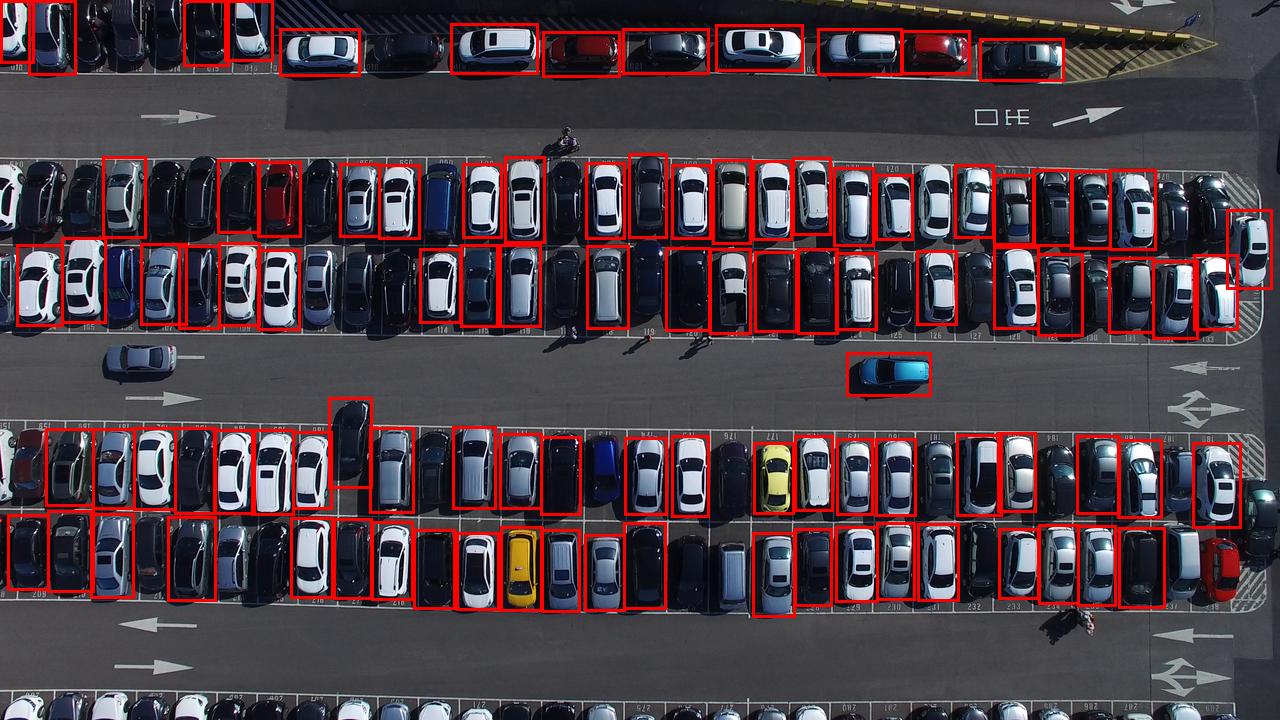

In [69]:
modelpredict(carpklotdataset,10)

In [65]:
carpklotdataset[0]

(tensor([[[0.3255, 0.3294, 0.3294,  ..., 0.2196, 0.1412, 0.0941],
          [0.3255, 0.3255, 0.3333,  ..., 0.1882, 0.1333, 0.0980],
          [0.3176, 0.3255, 0.3255,  ..., 0.1882, 0.1608, 0.0941],
          ...,
          [0.4745, 0.5333, 0.4863,  ..., 0.1137, 0.2235, 0.1451],
          [0.5843, 0.5804, 0.5569,  ..., 0.1922, 0.2157, 0.1490],
          [0.5412, 0.5412, 0.5529,  ..., 0.2235, 0.2627, 0.1373]],
 
         [[0.3255, 0.3294, 0.3294,  ..., 0.3059, 0.2275, 0.1804],
          [0.3255, 0.3255, 0.3333,  ..., 0.2745, 0.2196, 0.1843],
          [0.3176, 0.3255, 0.3255,  ..., 0.2745, 0.2471, 0.1804],
          ...,
          [0.4706, 0.5412, 0.5216,  ..., 0.1412, 0.2471, 0.1686],
          [0.5804, 0.5922, 0.5961,  ..., 0.2196, 0.2392, 0.1765],
          [0.5529, 0.5608, 0.5922,  ..., 0.2510, 0.2863, 0.1608]],
 
         [[0.3255, 0.3294, 0.3294,  ..., 0.2275, 0.1490, 0.1020],
          [0.3255, 0.3255, 0.3333,  ..., 0.1922, 0.1412, 0.1020],
          [0.3176, 0.3255, 0.3255,  ...,

In [14]:
x = torch.cat((carpklotdataset[0][0],carpklotdataset[1][0]))
x.resize_(2, 3,720,1280)
torch.onnx.export(model,args=x, f="carmodel.onnx", verbose=True)

c:\users\lin\appdata\local\programs\python\python37\lib\site-packages\torch\tensor.py:461: RuntimeWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  'incorrect results).', category=RuntimeWarning)
c:\users\lin\appdata\local\programs\python\python37\lib\site-packages\torch\onnx\symbolic_helper.py:246: UserWarning: You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mode).
We recommend using opset 11 and above for models using this operator. 
  "" + str(_export_onnx_

RuntimeError: Failed to export an ONNX attribute 'onnx::Sub', since it's not constant, please try to make things (e.g., kernel size) static if possible

In [17]:
dummy_input = torch.randn(10, 3, 224, 224, device='cpu')
model = torchvision.models.alexnet(pretrained=True)
input_names = [ "actual_input_1" ] + [ "learned_%d" % i for i in range(16) ]
output_names = [ "output1" ]
torch.onnx.export(model, dummy_input, "alexnet.onnx", verbose=True, input_names=input_names, output_names=output_names)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\lin/.cache\torch\checkpoints\alexnet-owt-4df8aa71.pth
100.0%


graph(%actual_input_1 : Float(10, 3, 224, 224),
      %learned_0 : Float(64, 3, 11, 11),
      %learned_1 : Float(64),
      %learned_2 : Float(192, 64, 5, 5),
      %learned_3 : Float(192),
      %learned_4 : Float(384, 192, 3, 3),
      %learned_5 : Float(384),
      %learned_6 : Float(256, 384, 3, 3),
      %learned_7 : Float(256),
      %learned_8 : Float(256, 256, 3, 3),
      %learned_9 : Float(256),
      %learned_10 : Float(4096, 9216),
      %learned_11 : Float(4096),
      %learned_12 : Float(4096, 4096),
      %learned_13 : Float(4096),
      %learned_14 : Float(1000, 4096),
      %learned_15 : Float(1000)):
  %17 : Float(10, 64, 55, 55) = onnx::Conv[dilations=[1, 1], group=1, kernel_shape=[11, 11], pads=[2, 2, 2, 2], strides=[4, 4]](%actual_input_1, %learned_0, %learned_1) # c:\users\lin\appdata\local\programs\python\python37\lib\site-packages\torch\nn\modules\conv.py:342:0
  %18 : Float(10, 64, 55, 55) = onnx::Relu(%17) # c:\users\lin\appdata\local\programs\python\python37